# <span style="font-family:cursive;"> FRIENDS</span>

<img src="https://e0.pxfuel.com/wallpapers/826/831/desktop-wallpaper-friends-tv-shown-minimalist-poster-friends-poster-friends-tv.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 250px;"/>


The **Friends TV Show Ratings and Votes** dataset contains updated IMDb ratings and vote counts for all episodes of the TV series *Friends* (1994–2004) as of July 2024. It includes the following details for each episode:

<span style="color:orange">-**Metadata**: Title, season, episode number, air year, director, and duration (in minutes).</span>

<span style="color:skyblue">- **Performance Metrics**: IMDb rating and total votes as of July 2024.</span>

<span style="color:pink">- **Special Episodes**: A column indicating if an episode is part of a two-part special.</span>

This dataset is useful for analyzing trends in ratings and viewer engagement across the show's ten seasons. It also highlights highly-rated or poorly-rated episodes. Future updates may expand the definition of "special episodes" to include holiday-themed or travel episodes.

##  <span style="color:skyblue">Friends Dataset ~ All right, kids, I gotta get to work-Chandler Bing ~</span>


<img src="https://miro.medium.com/v2/resize:fit:1400/0*uOEbv8Jb1WrHEG14.jpg" align='center' style="width: 250px;"/>



In [69]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

friends_path = '/kaggle/input/friends-tv-show-dataset-as-of-july-2024/friends_july_2024.csv'
friends_data = pd.read_csv(friends_path)
friends_data.head()


episode_title  \
0            The One Where Monica Gets a Roommate   
1            The One with the Sonogram at the End   
2                          The One with the Thumb   
3              The One with George Stephanopoulos   
4  The One with the East German Laundry Detergent   

                                         description  season  episode  \
0  Monica and the gang introduce Rachel to the "r...       1        1   
1  Ross finds out his ex-wife is pregnant. Rachel...       1        2   
2  Monica becomes irritated when everyone likes h...       1        3   
3  Joey and Chandler take Ross to a hockey game t...       1        4   
4  Eager to spend time with Rachel, Ross pretends...       1        5   

   duration_in_minutes  year       director  rating  total_votes  \
0                   22  1994  James Burrows     8.1        10266   
1                   22  1994  James Burrows     7.9         7986   
2                   22  1994  James Burrows     8.0         7632   
3                   22  1994  James Burrows     7.9         7302   
4                   22  1994  Pamela Fryman     8.3         7341   

   special_episode  
0                0  
1                0  
2                0  
3                0  
4                0

In [70]:
#Check if there is any missing values
missing_values = friends_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 episode_title          0
description            0
season                 0
episode                0
duration_in_minutes    0
year                   0
director               0
rating                 0
total_votes            0
special_episode        0
dtype: int64


##  <span style="color:skyblue">Episodes by Season ~ What are we supposed to be seeing here?-Joey Tribbiani ~</span>


<img src="https://i.pinimg.com/474x/f4/a9/1c/f4a91c2267d1657a1d2dc9a5dcc1e464.jpg" align='center' style="width: 100px;"/>


In [71]:
# Number of episodes per season
episodes_per_season = friends_data.groupby('season')[['episode']].count()

print("Number of episodes per season:")
episodes_per_season



Number of episodes per season:


episode
season         
1            24
2            24
3            25
4            24
5            24
6            25
7            24
8            24
9            23
10           17

In [72]:
# Calculate the average of episode duration by season
average_duration_per_season = friends_data.groupby('season')[['duration_in_minutes']].mean().round()

print("Average duration of episodes by season (in minutes):")
average_duration_per_season


Average duration of episodes by season (in minutes):


duration_in_minutes
season                     
1                      22.0
2                      22.0
3                      22.0
4                      23.0
5                      22.0
6                      23.0
7                      22.0
8                      22.0
9                      23.0
10                     23.0

##  <span style="color:skyblue">Votes by Season ~ Fantastic! I have one question: How is that possible?-Monica Geller ~</span>


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGI3LrP8B0umr4eOdKIvHsqQ-sC2S86GyujLwg-D75PtB0FllDKBlQ46mAi90SbRCRois&usqp=CAU" align='center' style="width: 100px;"/>


In [75]:
# Sum the total votes per season
total_votes_per_season = friends_data.groupby('season')['total_votes'].sum()

# Identify the season with the most votes
season_most_votes = total_votes_per_season.idxmax()

print("Total votes per season:")
for season, votes in total_votes_per_season.items():
    print(f"Season {season}: {votes:,} votes")
display(HTML(f"<b style='color: red;'>The season with the most votes is Season {season_most_votes}.⭐️📽️</b>"))


Total votes per season:
Season 1: 165,491 votes
Season 2: 145,422 votes
Season 3: 139,845 votes
Season 4: 132,268 votes
Season 5: 134,921 votes
Season 6: 127,476 votes
Season 7: 114,841 votes
Season 8: 116,439 votes
Season 9: 104,147 votes
Season 10: 95,884 votes


In [76]:
# Calculate the average rating per season
average_rating_per_season = friends_data.groupby('season')['rating'].mean()

# Identify the season with the highest average rating
season_highest_avg_rating = average_rating_per_season.idxmax()

print("Average rating per season:")
for season, avg_rating in average_rating_per_season.items():
    print(f"Season {season}: {avg_rating:,.2f} average rating")
display(HTML(f"<b style='color: red;'>The season with the highest average rating is Season {season_highest_avg_rating}.⭐️📽️</b>"))


Average rating per season:
Season 1: 8.14 average rating
Season 2: 8.28 average rating
Season 3: 8.25 average rating
Season 4: 8.33 average rating
Season 5: 8.43 average rating
Season 6: 8.32 average rating
Season 7: 8.25 average rating
Season 8: 8.28 average rating
Season 9: 8.11 average rating
Season 10: 8.48 average rating


##  <span style="color:skyblue">Special Episodes ~ That is brand new Information-Monica Geller ~</span>


<img src="https://tm.ibxk.com.br/2021/02/03/03145344206187.jpg" align='center' style="width: 250px;"/>

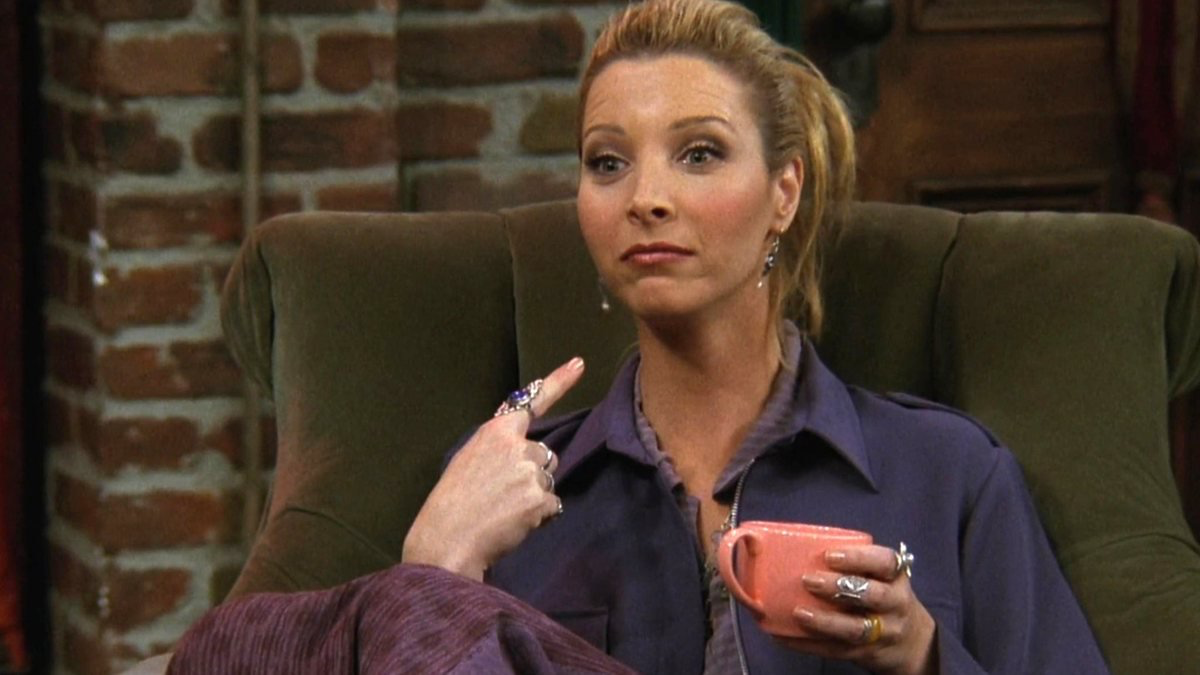
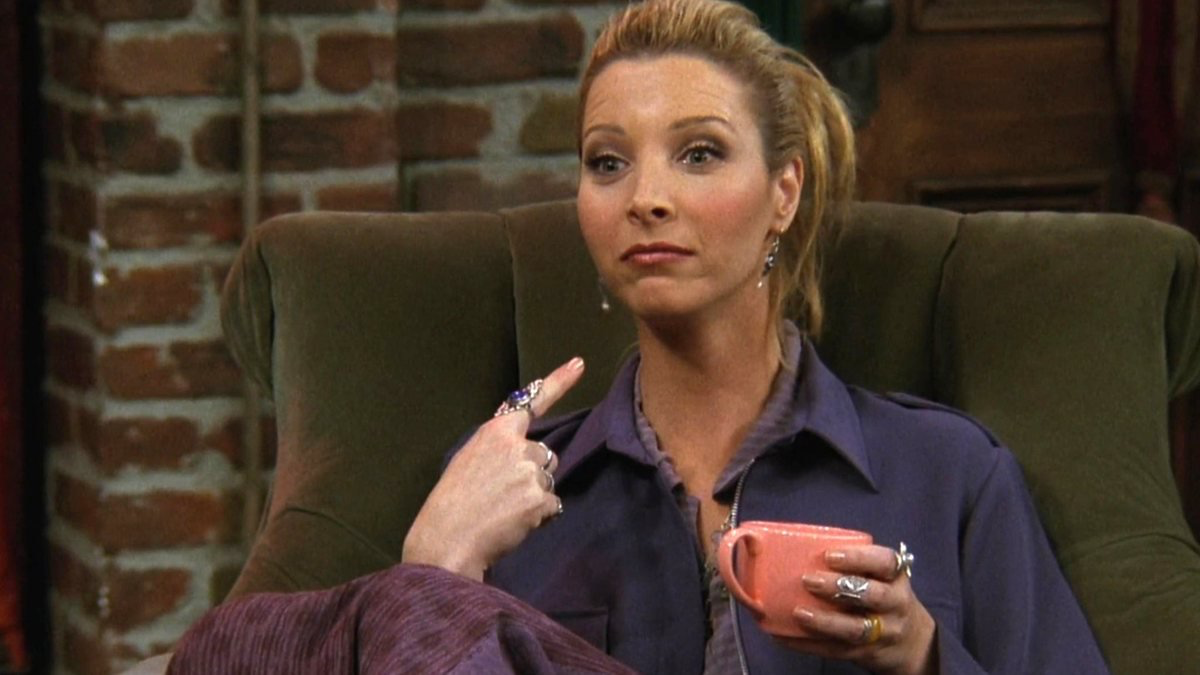
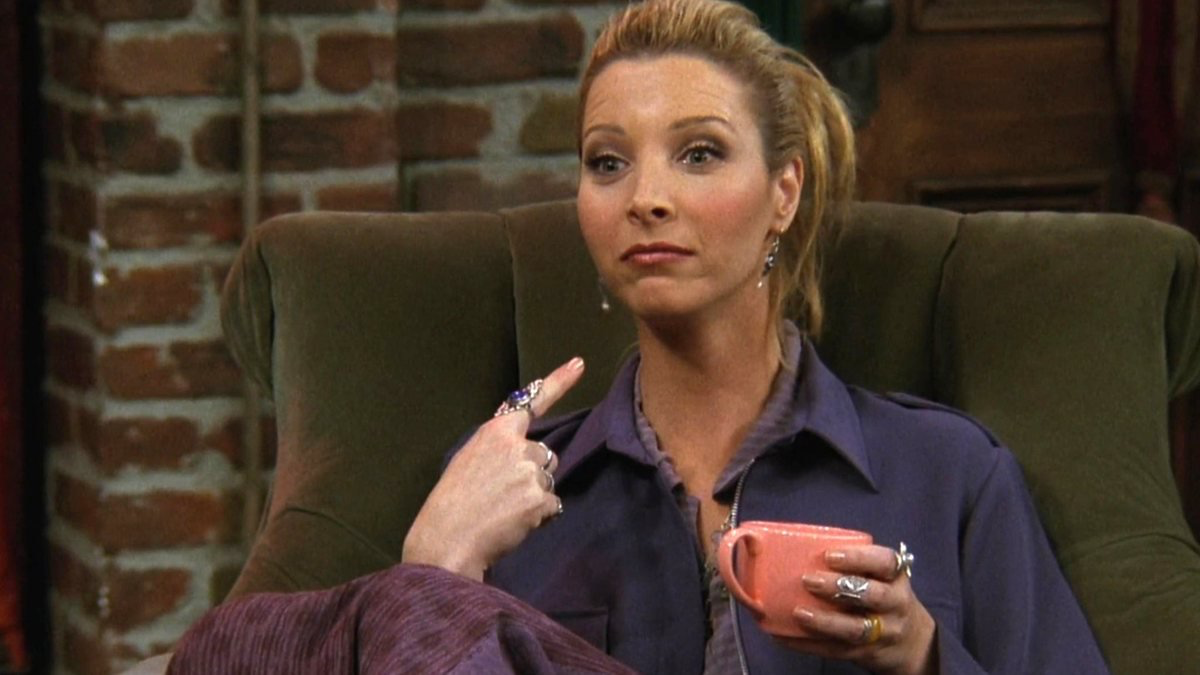
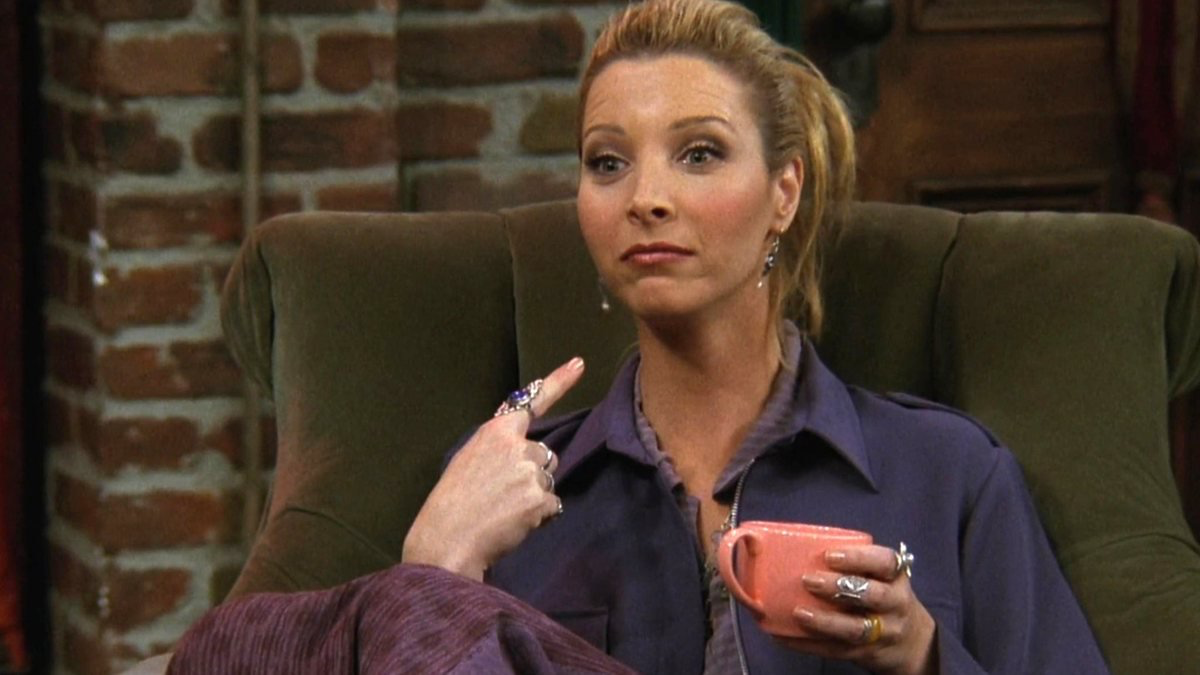

In [77]:
# Sum the total special episodes per season
special_episodes_per_season = friends_data.groupby('season')['special_episode'].sum()

# Season with the most special episodes
season_special = special_episodes_per_season.idxmax()
special_episodes_count = int(special_episodes_per_season.max())

print("Special Episodes by Season:")
for season, count in special_episodes_per_season.items():
    print(f"Season {season}: {count:,} special episodes")
display(HTML(f"<b style='color: red;'>The Season with the most special episodes is Season {season_special} with {special_episodes_count:,} special episodes ⭐️📽️</b>"))


Special Episodes by Season:
Season 1: 2 special episodes
Season 2: 2 special episodes
Season 3: 0 special episodes
Season 4: 2 special episodes
Season 5: 2 special episodes
Season 6: 4 special episodes
Season 7: 2 special episodes
Season 8: 2 special episodes
Season 9: 0 special episodes
Season 10: 1 special episodes


##  <span style="color:skyblue">~ You know what i figure?-Rachel Green ~</span>


<img src="https://i.pinimg.com/736x/7d/ba/53/7dba533a1416e091054ffaa6f4ff9b85.jpg" align='center' style="width: 250px;"/>


As Joey Tribbiani famously says, "Could I BE any more excited?" — *Friends* truly captured the hearts of millions, running for 10 incredibly successful seasons and becoming one of the most beloved TV shows of all time. The show maintained a consistent format across seasons, with most of the seasons featuring a similar number of episodes, except for the final season (Season 10), which aired just 17 episodes — a bittersweet end to an iconic journey. Despite this, *Friends* kept its signature 23-minute episode duration across all seasons, ensuring its timeless appeal to viewers.

As of July 2024, Season 1 stands out as the one with the highest number of IMDb votes, receiving an impressive 165k votes, showing the enduring popularity and fan engagement from the very beginning. However, it's *Season 10* that earns the title for the best rating with an average IMDb score of 8.48, proving that the series ended on a high note, giving fans a satisfying and memorable conclusion. 

And just like Ross’s iconic line, “We were on a break!” — Season 6 proved to be on a roll with the most special episodes. This season had the most two-part episodes, adding a unique touch to the storytelling that fans will forever remember.

*Friends* is a timeless classic, blending humor, heart, and unforgettable moments, and it's no wonder it has remained a cultural phenomenon, cherished by generations of fans worldwide.






<img src="https://i0.wp.com/couchsoup.com/wp-content/uploads/2021/10/friends-s1e8-group.jpg?resize=800%2C393&ssl=1" style="display: block; margin-left: auto; margin-right: auto; width: 400px;"/>
